In [1]:
import pandas as pd
from glob import glob

# Obtener todos los archivos CSV en el directorio actual
csv_files = glob('*.csv')

# Crear una lista vacía para almacenar los DataFrames
dataframes = []

# Iterar sobre cada archivo CSV
for file in csv_files:
    # Leer el archivo CSV en un DataFrame
    df = pd.read_csv(file)
    
    # Extraer el nombre del archivo sin la extensión y crear una nueva columna
    df['Archivo'] = file.split('.')[0]
    
    # Agregar el DataFrame a la lista
    dataframes.append(df)

# Concatenar todos los DataFrames en uno solo
all_data = pd.concat(dataframes, ignore_index=True)
all_data['Archivo'] = all_data['Archivo'].astype(str).str.replace('_GIS', '', regex=False)
all_data_filtered = all_data[['Archivo', 'Sum_Desmophyllum pertusum', 'Sum_Madrepora oculata']]



print(all_data_filtered)

         Archivo  Sum_Desmophyllum pertusum  Sum_Madrepora oculata
0     IC222_TF07                       0.00                   0.02
1     IC222_TF07                       0.00                   0.18
2     IC222_TF07                       0.00                   0.03
3     IC222_TF07                       0.00                   0.04
4     IC222_TF07                       0.00                   0.08
...          ...                        ...                    ...
2590  E0719_TF18                       0.26                   0.26
2591  E0719_TF18                       0.68                   0.00
2592  E0719_TF18                       0.00                   0.17
2593  E0719_TF18                       0.00                   0.62
2594  E0719_TF18                       0.71                   0.71

[2595 rows x 3 columns]


In [2]:
import pandas as pd
import scipy.stats as stats

# 2. Prueba de Shapiro-Wilk por grupo:
def shapiro_test(x):
    return stats.shapiro(x)[1]  # Devolver solo el valor p

shapiro_results = all_data_filtered.groupby('Archivo').agg(
    Shapiro_Desmophyllum_pertusum=('Sum_Desmophyllum pertusum', shapiro_test),
    Shapiro_Madrepora_oculata=('Sum_Madrepora oculata', shapiro_test)
).reset_index()

# 3. Prueba de Levene por grupo:
def levene_test(x):
    return stats.levene(*x)[1]  # Devolver solo el valor p

levene_results = all_data_filtered.groupby('Archivo').agg(
    Levene=('Sum_Desmophyllum pertusum', lambda x: levene_test([x, all_data_filtered['Sum_Madrepora oculata']]))
).reset_index()

# 4. Imprimir resultados
print("Resultados de la prueba de Shapiro-Wilk:")
print(shapiro_results)
print("\nResultados de la prueba de Levene:")
print(levene_results)

Resultados de la prueba de Shapiro-Wilk:
       Archivo  Shapiro_Desmophyllum_pertusum  Shapiro_Madrepora_oculata
0   E0424_TF20                   2.267033e-11               3.154064e-05
1   E0424_TF25                   3.339988e-16               1.301714e-11
2   E0424_TF43                   2.754220e-10               1.033742e-07
3   E0424_TF44                   5.397353e-01               2.422493e-04
4   E0424_TF51                   3.491616e-06               1.982232e-05
5   E0424_TF62                   6.123977e-14               1.430574e-14
6   E0514_TF07                   4.216027e-16               1.099460e-10
7   E0717_TF14                   3.156583e-13               3.002733e-07
8   E0717_TF15                   2.822021e-15               5.277046e-11
9   E0717_TF16                   2.262840e-19               2.728605e-13
10  E0719_TF05                   7.462824e-11               4.475568e-04
11  E0719_TF16                   1.355729e-16               1.518565e-13
12  E0719_

In [3]:
import pandas as pd
from scipy.stats import kruskal
import numpy as np

# Añadir una pequeña constante para evitar errores con el logaritmo de cero
all_data_filtered['Log_Desmophyllum pertusum'] = np.log(all_data_filtered['Sum_Desmophyllum pertusum'] + 0.0001)
all_data_filtered['Log_Madrepora oculata'] = np.log(all_data_filtered['Sum_Madrepora oculata'] + 0.0001)

# Realizar el test de Kruskal-Wallis para 'Sum_Desmophyllum pertusum'
desmophyllum_groups = [group['Sum_Desmophyllum pertusum'].values for name, group in all_data_filtered.groupby('Archivo')]
desmophyllum_stat, desmophyllum_p = kruskal(*desmophyllum_groups)

# Realizar el test de Kruskal-Wallis para 'Sum_Madrepora oculata'
madrepora_groups = [group['Sum_Madrepora oculata'].values for name, group in all_data_filtered.groupby('Archivo')]
madrepora_stat, madrepora_p = kruskal(*madrepora_groups)

# Imprimir los resultados
print("Resultados del test de Kruskal-Wallis para Sum_Desmophyllum pertusum:")
print(f"Estadístico H: {desmophyllum_stat}, valor p: {desmophyllum_p}")
print("\nResultados del test de Kruskal-Wallis para Sum_Madrepora oculata:")
print(f"Estadístico H: {madrepora_stat}, valor p: {madrepora_p}")

Resultados del test de Kruskal-Wallis para Sum_Desmophyllum pertusum:
Estadístico H: 1000.6136749295538, valor p: 2.8889075640534193e-199

Resultados del test de Kruskal-Wallis para Sum_Madrepora oculata:
Estadístico H: 808.054044895011, valor p: 2.7604696937937422e-158


/tmp/ipykernel_145837/945727448.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_filtered['Log_Desmophyllum pertusum'] = np.log(all_data_filtered['Sum_Desmophyllum pertusum'] + 0.0001)
/tmp/ipykernel_145837/945727448.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_filtered['Log_Madrepora oculata'] = np.log(all_data_filtered['Sum_Madrepora oculata'] + 0.0001)


In [4]:
import pandas as pd
from scipy.stats import kruskal
import numpy as np

# Filtrar los datos para excluir los ceros
df_filtered_no_zeros = all_data_filtered[(all_data_filtered['Sum_Desmophyllum pertusum'] != 0) & (all_data_filtered['Sum_Madrepora oculata'] != 0)]

# Crear nuevas columnas con los valores transformados
df_filtered_no_zeros['Log_Desmophyllum pertusum'] = np.log(
    df_filtered_no_zeros['Sum_Desmophyllum pertusum'] + 0.0001
)
df_filtered_no_zeros['Log_Madrepora oculata'] = np.log(df_filtered_no_zeros['Sum_Madrepora oculata'] + 0.0001)

# Función para realizar el test de Kruskal-Wallis si hay suficientes grupos
def realizar_kruskal_wallis(df, especie):
    unique_groups = df['Archivo'].unique()
    if len(unique_groups) >= 2:
        groups = [
            group[especie].values for name, group in df.groupby('Archivo')
        ]
        stat, p = kruskal(*groups)
        print(f"Resultados del test de Kruskal-Wallis para {especie} (sin ceros):")
        print(f"Estadístico H: {stat}, valor p: {p}")
    else:
        print(f"No se puede realizar el test de Kruskal-Wallis para {especie} porque solo hay un grupo presente.")

# Realizar el test para cada especie
for especie in ['Log_Desmophyllum pertusum', 'Log_Madrepora oculata']:
    realizar_kruskal_wallis(df_filtered_no_zeros, especie)

Resultados del test de Kruskal-Wallis para Log_Desmophyllum pertusum (sin ceros):
Estadístico H: 238.3508917320796, valor p: 1.8907643322117226e-40
Resultados del test de Kruskal-Wallis para Log_Madrepora oculata (sin ceros):
Estadístico H: 364.7746584629902, valor p: 1.9588130275979196e-66


/tmp/ipykernel_145837/3747398541.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_zeros['Log_Desmophyllum pertusum'] = np.log(
/tmp/ipykernel_145837/3747398541.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_zeros['Log_Madrepora oculata'] = np.log(df_filtered_no_zeros['Sum_Madrepora oculata'] + 0.0001)


In [5]:
import pandas as pd
from scipy.stats import kruskal
import numpy as np

# Filtrar los datos para excluir los ceros
df_filtered_no_zeros = all_data_filtered[(all_data_filtered['Sum_Desmophyllum pertusum'] != 0) & (all_data_filtered['Sum_Madrepora oculata'] != 0)]

# Crear nuevas columnas con los valores transformados (raíz cuadrada)
df_filtered_no_zeros['Sqrt_Desmophyllum pertusum'] = np.sqrt(df_filtered_no_zeros['Sum_Desmophyllum pertusum'])
df_filtered_no_zeros['Sqrt_Madrepora oculata'] = np.sqrt(df_filtered_no_zeros['Sum_Madrepora oculata'])

# Función para realizar el test de Kruskal-Wallis si hay suficientes grupos
def realizar_kruskal_wallis(df, especie):
    unique_groups = df['Archivo'].unique()
    if len(unique_groups) >= 2:
        groups = [group[especie].values for name, group in df.groupby('Archivo')]
        stat, p = kruskal(*groups)
        print(f"Resultados del test de Kruskal-Wallis para {especie} (sin ceros):")
        print(f"Estadístico H: {stat}, valor p: {p}")
    else:
        print(f"No se puede realizar el test de Kruskal-Wallis para {especie} porque solo hay un grupo presente.")

# Realizar el test para cada especie
for especie in ['Sqrt_Desmophyllum pertusum', 'Sqrt_Madrepora oculata']:
    realizar_kruskal_wallis(df_filtered_no_zeros, especie)

Resultados del test de Kruskal-Wallis para Sqrt_Desmophyllum pertusum (sin ceros):
Estadístico H: 238.30221220372337, valor p: 1.934214497569093e-40
Resultados del test de Kruskal-Wallis para Sqrt_Madrepora oculata (sin ceros):
Estadístico H: 364.76352836846047, valor p: 1.969266267833548e-66


/tmp/ipykernel_145837/3814040189.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_zeros['Sqrt_Desmophyllum pertusum'] = np.sqrt(df_filtered_no_zeros['Sum_Desmophyllum pertusum'])
/tmp/ipykernel_145837/3814040189.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_zeros['Sqrt_Madrepora oculata'] = np.sqrt(df_filtered_no_zeros['Sum_Madrepora oculata'])


/tmp/ipykernel_145837/2411147075.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_zeros['Sqrt_Desmophyllum pertusum'] = np.sqrt(df_filtered_no_zeros['Sum_Desmophyllum pertusum'])
/tmp/ipykernel_145837/2411147075.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_zeros['Sqrt_Madrepora oculata'] = np.sqrt(df_filtered_no_zeros['Sum_Madrepora oculata'])



Prueba de Dunn para Sqrt_Desmophyllum pertusum (sin ceros):
              E0424_TF20  E0424_TF25  E0424_TF43  E0424_TF44  E0424_TF51  \
E0424_TF20  1.000000e+00    0.627350    1.000000         1.0         1.0   
E0424_TF25  6.273496e-01    1.000000    1.000000         1.0         1.0   
E0424_TF43  1.000000e+00    1.000000    1.000000         1.0         1.0   
E0424_TF44  1.000000e+00    1.000000    1.000000         1.0         1.0   
E0424_TF51  1.000000e+00    1.000000    1.000000         1.0         1.0   
E0424_TF62  2.953286e-01    1.000000    1.000000         1.0         1.0   
E0514_TF07  1.481978e-02    1.000000    0.625977         1.0         1.0   
E0717_TF14  4.718281e-09    0.014234    0.000011         1.0         1.0   
E0717_TF15  1.613938e-09    0.005838    0.000004         1.0         1.0   
E0717_TF16  3.241171e-10    0.001942    0.000001         1.0         1.0   
E0719_TF16  1.000000e+00    1.000000    1.000000         1.0         1.0   
E0719_TF18  1.000000e+00   

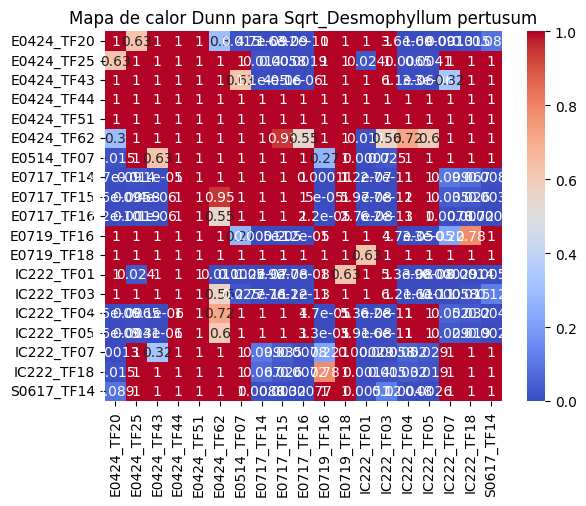


Prueba de Dunn para Sqrt_Madrepora oculata (sin ceros):
              E0424_TF20    E0424_TF25    E0424_TF43  E0424_TF44  E0424_TF51  \
E0424_TF20  1.000000e+00  1.000000e+00  1.000000e+00         1.0         1.0   
E0424_TF25  1.000000e+00  1.000000e+00  1.000000e+00         1.0         1.0   
E0424_TF43  1.000000e+00  1.000000e+00  1.000000e+00         1.0         1.0   
E0424_TF44  1.000000e+00  1.000000e+00  1.000000e+00         1.0         1.0   
E0424_TF51  1.000000e+00  1.000000e+00  1.000000e+00         1.0         1.0   
E0424_TF62  3.310296e-01  1.000000e+00  9.625626e-01         1.0         1.0   
E0514_TF07  8.717501e-03  5.676064e-02  2.772616e-02         1.0         1.0   
E0717_TF14  2.308200e-11  3.279904e-12  5.126925e-11         1.0         1.0   
E0717_TF15  1.087674e-10  2.625772e-11  2.677352e-10         1.0         1.0   
E0717_TF16  1.646412e-07  1.743050e-07  5.370440e-07         1.0         1.0   
E0719_TF16  1.000000e+00  1.000000e+00  1.000000e+00         1.

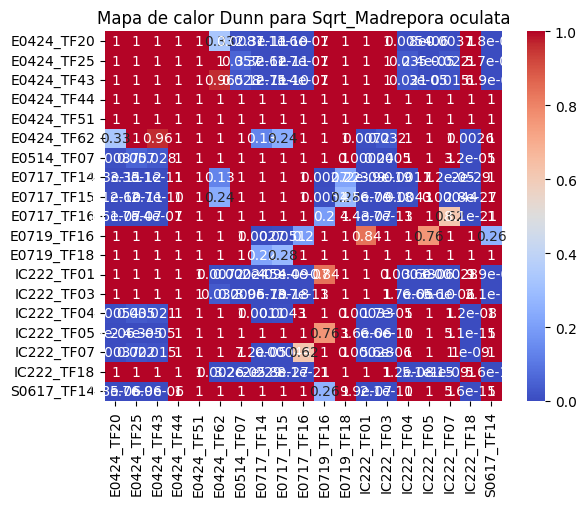

In [6]:
import pandas as pd
from scipy.stats import kruskal
import numpy as np
import scikit_posthocs as sp
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los datos para excluir los ceros
df_filtered_no_zeros = all_data_filtered[(all_data_filtered['Sum_Desmophyllum pertusum'] != 0) & (all_data_filtered['Sum_Madrepora oculata'] != 0)]

# Crear nuevas columnas con los valores transformados (raíz cuadrada)
df_filtered_no_zeros['Sqrt_Desmophyllum pertusum'] = np.sqrt(df_filtered_no_zeros['Sum_Desmophyllum pertusum'])
df_filtered_no_zeros['Sqrt_Madrepora oculata'] = np.sqrt(df_filtered_no_zeros['Sum_Madrepora oculata'])

# Realizar la prueba de Dunn para cada especie
for especie in ['Sqrt_Desmophyllum pertusum', 'Sqrt_Madrepora oculata']:
    print(f"\nPrueba de Dunn para {especie} (sin ceros):")
    dunn_result = sp.posthoc_dunn(df_filtered_no_zeros, val_col=especie, group_col='Archivo', p_adjust='bonferroni')
    print(dunn_result)

    # Visualizar los resultados de Dunn con un mapa de calor
    print(f"\nMapa de calor de la prueba de Dunn para {especie} (sin ceros):")
    sns.heatmap(dunn_result, annot=True, cmap='coolwarm')
    plt.title(f'Mapa de calor Dunn para {especie}')
    plt.show()

/tmp/ipykernel_145837/2974038846.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_zeros['Sqrt_Desmophyllum pertusum'] = np.sqrt(df_filtered_no_zeros['Sum_Desmophyllum pertusum'])
/tmp/ipykernel_145837/2974038846.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_no_zeros['Sqrt_Madrepora oculata'] = np.sqrt(df_filtered_no_zeros['Sum_Madrepora oculata'])



Prueba de Dunn para Sqrt_Desmophyllum pertusum (sin ceros):

Mapa de calor de la prueba de Dunn para Sqrt_Desmophyllum pertusum (sin ceros):


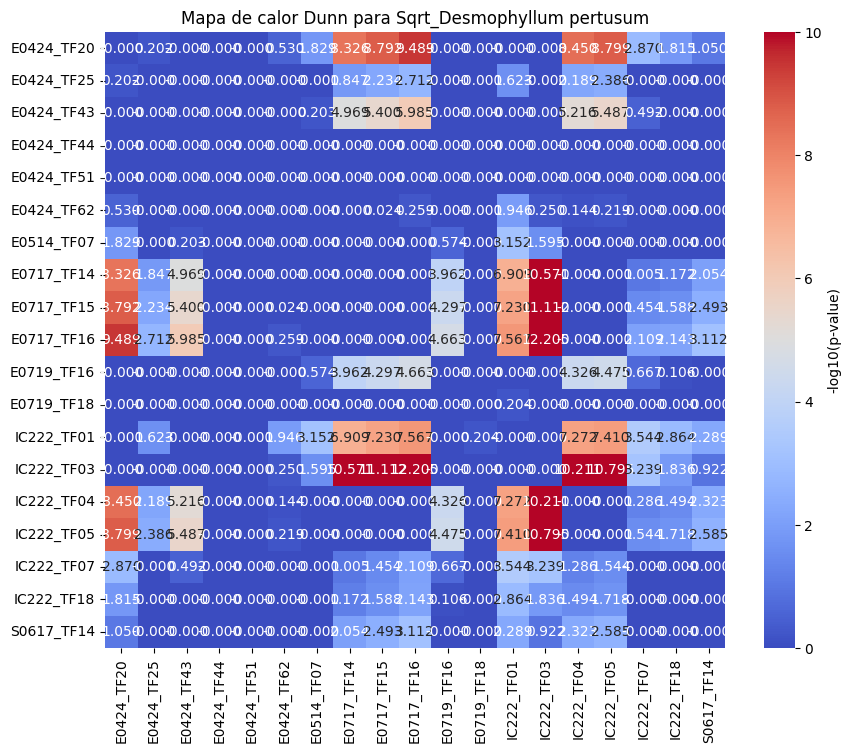


Prueba de Dunn para Sqrt_Madrepora oculata (sin ceros):

Mapa de calor de la prueba de Dunn para Sqrt_Madrepora oculata (sin ceros):


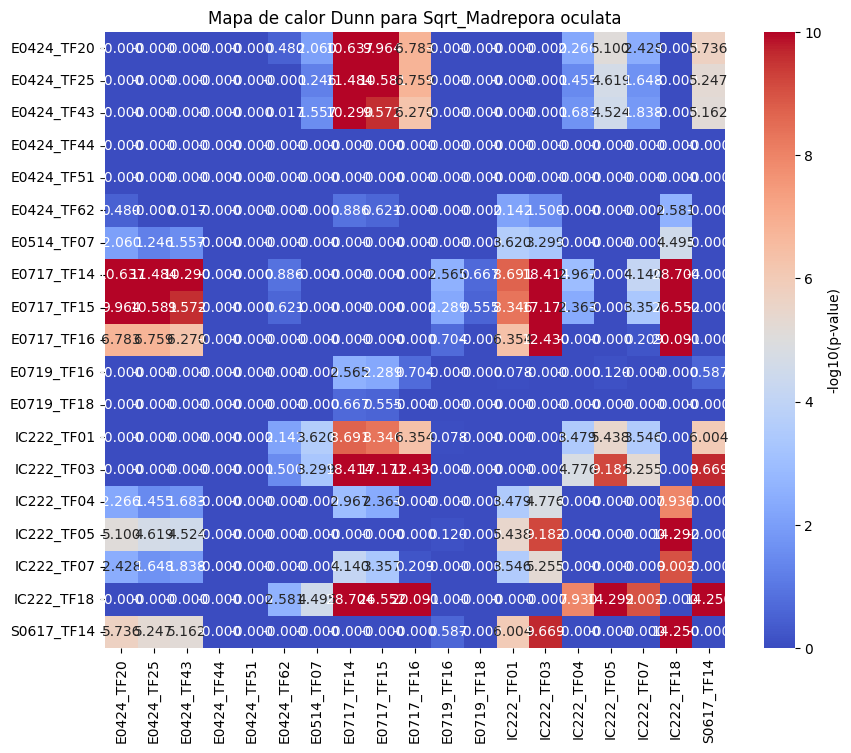

In [7]:
import pandas as pd
from scipy.stats import kruskal
import numpy as np
import scikit_posthocs as sp
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los datos para excluir los ceros
df_filtered_no_zeros = all_data_filtered[(all_data_filtered['Sum_Desmophyllum pertusum'] != 0) & (all_data_filtered['Sum_Madrepora oculata'] != 0)]

# Crear nuevas columnas con los valores transformados (raíz cuadrada)
df_filtered_no_zeros['Sqrt_Desmophyllum pertusum'] = np.sqrt(df_filtered_no_zeros['Sum_Desmophyllum pertusum'])
df_filtered_no_zeros['Sqrt_Madrepora oculata'] = np.sqrt(df_filtered_no_zeros['Sum_Madrepora oculata'])

# Realizar la prueba de Dunn para cada especie
for especie in ['Sqrt_Desmophyllum pertusum', 'Sqrt_Madrepora oculata']:
    print(f"\nPrueba de Dunn para {especie} (sin ceros):")
    dunn_result = sp.posthoc_dunn(df_filtered_no_zeros, val_col=especie, group_col='Archivo', p_adjust='bonferroni')
    
    # Transformación de valores p
    dunn_result = -np.log10(dunn_result)

    # Visualización mejorada del mapa de calor
    print(f"\nMapa de calor de la prueba de Dunn para {especie} (sin ceros):")
    plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura si es necesario
    sns.heatmap(dunn_result, annot=True, cmap='coolwarm', fmt='.3f', 
                cbar_kws={'label': '-log10(p-value)'}, vmin=0, vmax=10)
    plt.title(f'Mapa de calor Dunn para {especie}')
    plt.show()


Prueba de Dunn para Sum_Desmophyllum pertusum (sin ceros):
Kruskal-Wallis H-test: Estadística=238.35128318707743, Valor p=1.8904189122431246e-40

Mapa de calor de la prueba de Dunn para Sum_Desmophyllum pertusum (sin ceros):


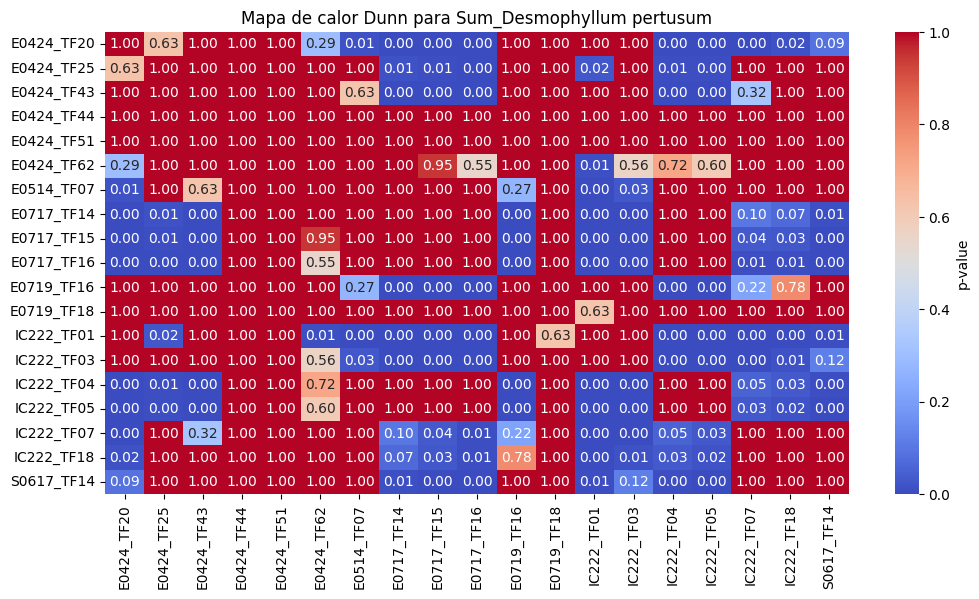


Prueba de Dunn para Sum_Madrepora oculata (sin ceros):
Kruskal-Wallis H-test: Estadística=364.77434422673423, Valor p=1.9591073918384777e-66

Mapa de calor de la prueba de Dunn para Sum_Madrepora oculata (sin ceros):


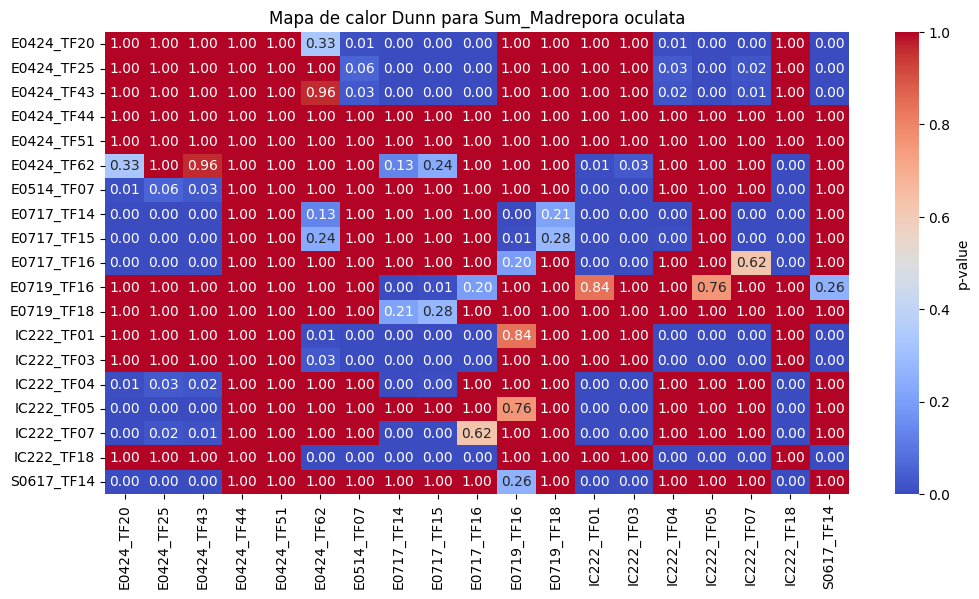

In [8]:
import pandas as pd
from scipy.stats import kruskal
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Filtrar los datos para excluir los ceros
df_filtered_no_zeros = all_data_filtered[
    (all_data_filtered['Sum_Desmophyllum pertusum'] != 0) & 
    (all_data_filtered['Sum_Madrepora oculata'] != 0)
]

# Realizar la prueba de Dunn para cada especie (sin transformación)
for especie in ['Sum_Desmophyllum pertusum', 'Sum_Madrepora oculata']:
    print(f"\nPrueba de Dunn para {especie} (sin ceros):")

    # 3. Crear DataFrame con valores y nombres de transectos
    df_especie = df_filtered_no_zeros[['Archivo', especie]].rename(columns={especie: 'valor'})

    # 4. Prueba de Kruskal-Wallis
    stat, p_value = kruskal(*[group['valor'].values for name, group in df_especie.groupby('Archivo')])
    print(f"Kruskal-Wallis H-test: Estadística={stat:}, Valor p={p_value:}")

    if p_value < 0.05:
        # Prueba de Dunn si Kruskal-Wallis es significativa
        dunn_result = sp.posthoc_dunn(df_especie, val_col='valor', group_col='Archivo', p_adjust='bonferroni')

        # 5. Visualización del mapa de calor con formato reducido
        print(f"\nMapa de calor de la prueba de Dunn para {especie} (sin ceros):")
        plt.figure(figsize=(12, 6))  
        sns.heatmap(dunn_result, annot=True, cmap='coolwarm', fmt='.2f',
                    cbar_kws={'label': 'p-value'}, vmin=0, vmax=1)
        plt.title(f'Mapa de calor Dunn para {especie}')
        plt.show()
    else:
        print("No se realiza la prueba de Dunn ya que el Kruskal-Wallis no es significativo.")

In [9]:
dunn_result

,E0424_TF20,E0424_TF25,E0424_TF43,E0424_TF44,E0424_TF51,E0424_TF62,E0514_TF07,E0717_TF14,E0717_TF15,E0717_TF16,E0719_TF16,E0719_TF18,IC222_TF01,IC222_TF03,IC222_TF04,IC222_TF05,IC222_TF07,IC222_TF18,S0617_TF14
E0424_TF20,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.0,0.331652,0.008652,2.288696e-11,1.081249e-10,1.649980e-07,1.000000,1.000000,1.000000e+00,1.000000e+00,5.400660e-03,7.943328e-06,3.720444e-03,1.000000e+00,1.842848e-06
E0424_TF25,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.0,1.000000,0.056323,3.241572e-12,2.603776e-11,1.746013e-07,1.000000,1.000000,1.000000e+00,1.000000e+00,3.490163e-02,2.400514e-05,2.236279e-02,1.000000e+00,5.673773e-06
E0424_TF43,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.0,0.963945,0.027513,5.075823e-11,2.657998e-10,5.377655e-07,1.000000,1.000000,1.000000e+00,1.000000e+00,2.064696e-02,2.988129e-05,1.445835e-02,1.000000e+00,6.906032e-06
E0424_TF44,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.0,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
E0424_TF51,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.0,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
E0424_TF62,3.316522e-01,1.000000e+00,9.639453e-01,1.0,1.0,1.000000,1.000000,1.292226e-01,2.377983e-01,1.000000e+00,1.000000,1.000000,7.239964e-03,3.180736e-02,1.000000e+00,1.000000e+00,1.000000e+00,2.643780e-03,1.000000e+00
E0514_TF07,8.651825e-03,5.632346e-02,2.751328e-02,1.0,1.0,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,2.387159e-04,4.998597e-04,1.000000e+00,1.000000e+00,1.000000e+00,3.178671e-05,1.000000e+00
E0717_TF14,2.288696e-11,3.241572e-12,5.075823e-11,1.0,1.0,0.129223,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.002719,0.213201,2.029876e-09,3.848529e-19,1.077708e-03,1.000000e+00,7.229061e-05,1.971986e-29,1.000000e+00
E0717_TF15,1.081249e-10,2.603776e-11,2.657998e-10,1.0,1.0,0.237798,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.005135,0.276033,4.496918e-09,6.765190e-18,4.343974e-03,1.000000e+00,4.404750e-04,2.813628e-27,1.000000e+00
E0717_TF16,1.649980e-07,1.746013e-07,5.377655e-07,1.0,1.0,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.197982,1.000000,4.444016e-07,3.768018e-13,1.000000e+00,1.000000e+00,6.221957e-01,8.256599e-21,1.000000e+00



Kruskal-Wallis H-test (ambas especies): Estadística=531.227450008281, Valor p=2.799871302391603e-101


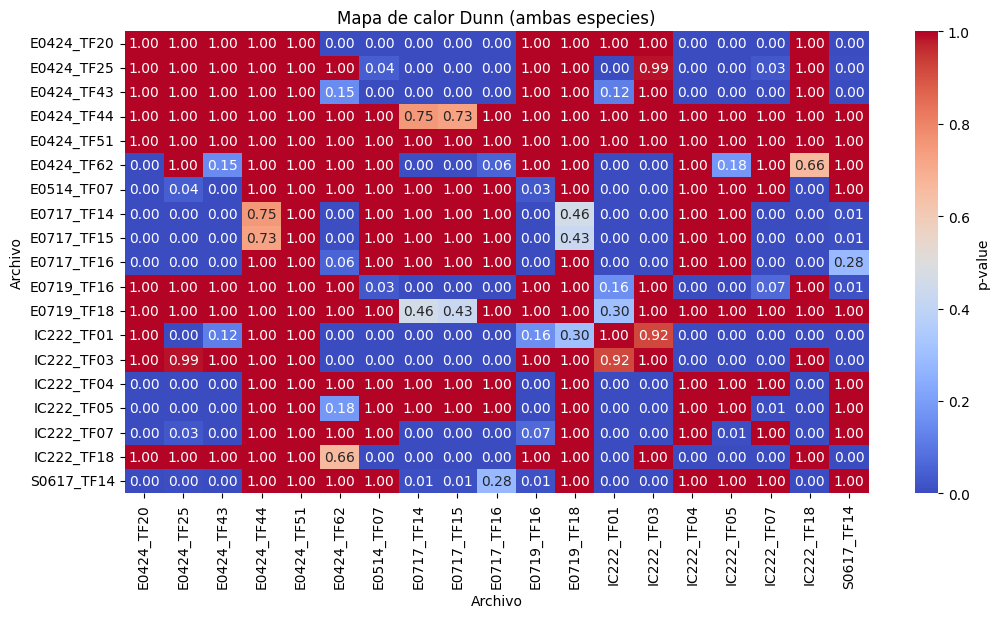

In [10]:
# 1. Combinar datos de ambas especies
df_combined = pd.melt(df_filtered_no_zeros, id_vars='Archivo', value_vars=['Sum_Desmophyllum pertusum', 'Sum_Madrepora oculata'], var_name='Especie', value_name='Abundancia')

# 3. Realizar el test Kruskal-Wallis
stat, p_value = kruskal(*[group["Abundancia"].values for name, group in df_combined.groupby("Archivo")])
print(f"\nKruskal-Wallis H-test (ambas especies): Estadística={stat:}, Valor p={p_value:}")

if p_value < 0.05:
    # 4.1. Realizar el test de Dunn si Kruskal-Wallis es significativo
    dunn_result = sp.posthoc_dunn(df_combined, val_col='Abundancia', group_col='Archivo', p_adjust='bonferroni')

    # 4.2. Crear mapa de calor
    plt.figure(figsize=(12, 6))
    sns.heatmap(dunn_result, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'p-value'}, vmin=0, vmax=1)
    plt.title('Mapa de calor Dunn (ambas especies)')
    plt.xlabel('Archivo')
    plt.ylabel('Archivo')

    # 4.3 Mostrar el mapa de calor
    plt.show()
else:
    # 5. Imprimir mensaje si Kruskal-Wallis no es significativo
    print("No se realiza la prueba de Dunn ya que el Kruskal-Wallis no es significativo.")

In [11]:
import pandas as pd
import numpy as np
import altair as alt
from sklearn.manifold import MDS
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 2. Reconstruir la matriz completa a partir del triángulo inferior
all_samples = list(set(dunn_result.index) | set(dunn_result.columns))  # Convertir a lista
dunn_result_full = pd.DataFrame(index=all_samples, columns=all_samples)
for idx in dunn_result.index:
    for col in dunn_result.columns:
        if pd.notna(dunn_result.loc[idx, col]):
            dunn_result_full.loc[idx, col] = dunn_result.loc[idx, col]
            dunn_result_full.loc[col, idx] = dunn_result.loc[idx, col]  # Simetría
dunn_result_full = dunn_result_full.fillna(1.0)  # Diagonal principal

# 3. Convertir el DataFrame a numérico
dunn_result_full = dunn_result_full.astype(float)

# 4. Calcular la matriz de distancias (disimilitudes)
distance_matrix = 1 - dunn_result_full.abs()

# 5. Realizar nMDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
nmds_results = mds.fit_transform(distance_matrix)

# 6. Crear un DataFrame con los resultados de nMDS
nmds_df = pd.DataFrame(nmds_results, columns=['Dimension 1', 'Dimension 2'], index=distance_matrix.index)

# 7. Crear gráfico de dispersión nMDS
nmds_chart = alt.Chart(nmds_df.reset_index()).mark_circle().encode(
    x='Dimension 1',
    y='Dimension 2',
    tooltip=['index', 'Dimension 1', 'Dimension 2']
).properties(
    title='nMDS de la prueba de Dunn'
).interactive()

nmds_chart.save('nmds_dunn_test.json')

# 8. Clustering jerárquico
linkage_matrix = linkage(distance_matrix, method='average')

# 9. Dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=distance_matrix.index, orientation='top')
plt.title('Dendrograma Jerárquico (Distancia de Dunn)')
plt.xlabel('Muestra')
plt.ylabel('Distancia')
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'altair'

/tmp/ipykernel_145837/159147957.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (nmds_df['Dimension 1'][i], nmds_df['Dimension 2'][i]))


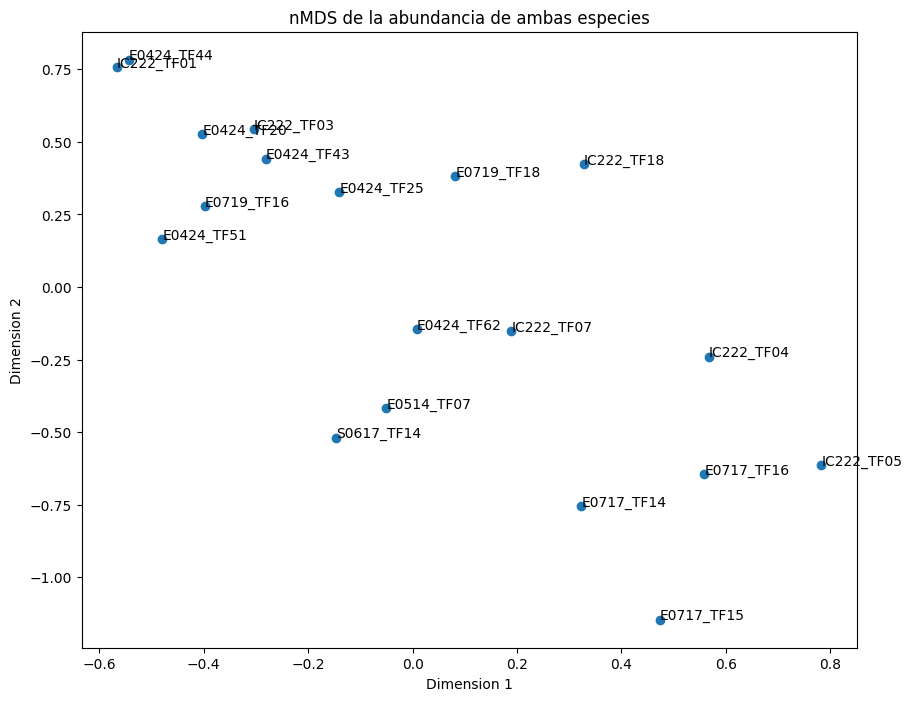

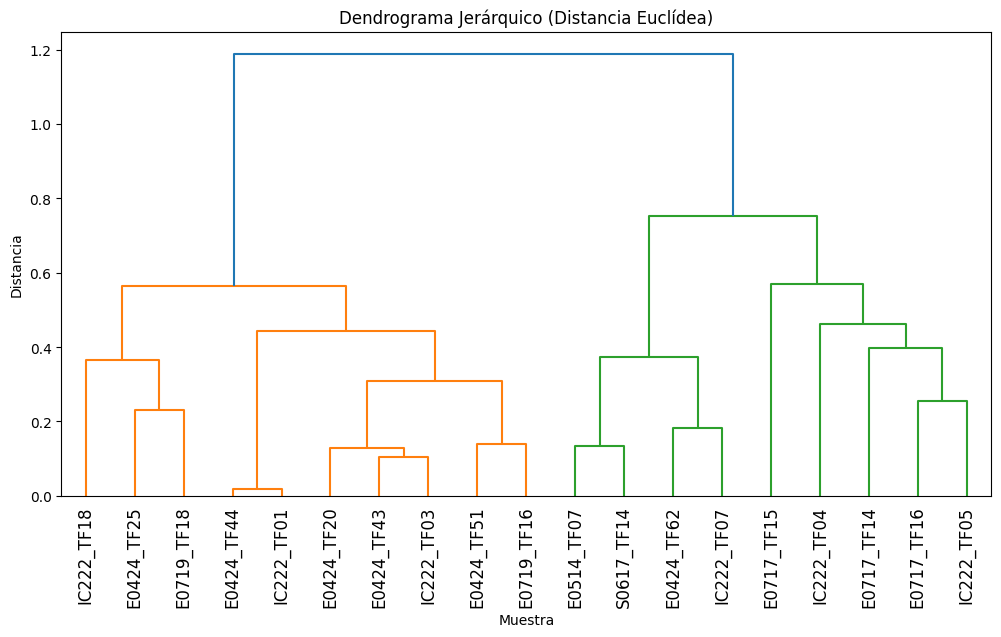

In [12]:
from sklearn.manifold import MDS
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 1. Combinar datos de ambas especies
df_combined = pd.melt(df_filtered_no_zeros, id_vars='Archivo', value_vars=['Sum_Desmophyllum pertusum', 'Sum_Madrepora oculata'], var_name='Especie', value_name='Abundancia')

# 2. Calcular la matriz de distancias (disimilitudes) basada en la abundancia
distance_matrix = df_combined.pivot_table(index='Archivo', columns='Especie', values='Abundancia')

# 3. Realizar nMDS
mds = MDS(n_components=2, dissimilarity='euclidean', random_state=0)  # Usamos 'euclidean' como distancia por defecto
nmds_results = mds.fit_transform(distance_matrix)

# 4. Crear un DataFrame con los resultados de nMDS
nmds_df = pd.DataFrame(nmds_results, columns=['Dimension 1', 'Dimension 2'], index=distance_matrix.index)

# 5. Visualizar el gráfico nMDS con matplotlib
plt.figure(figsize=(10, 8))
plt.scatter(nmds_df['Dimension 1'], nmds_df['Dimension 2'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('nMDS de la abundancia de ambas especies')
for i, txt in enumerate(nmds_df.index):
    plt.annotate(txt, (nmds_df['Dimension 1'][i], nmds_df['Dimension 2'][i]))
plt.show()

# 6. Clustering jerárquico
linkage_matrix = linkage(distance_matrix, method='average')

# 7. Dendrograma con etiquetas verticales y sin solapamiento
plt.figure(figsize=(12, 8))  # Aumentar el tamaño de la figura
dendrogram(linkage_matrix, labels=distance_matrix.index, orientation='top', leaf_rotation=90)  # Rotar etiquetas
plt.title('Dendrograma Jerárquico (Distancia Euclídea)')
plt.xlabel('Muestra')
plt.ylabel('Distancia')
plt.subplots_adjust(bottom=0.3)  # Ajustar el margen inferior para evitar que se corten las etiquetas
plt.show()